In [3]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 4.3 MB/s eta 0:00:01


In [1]:
from IPython.display import Image

In [55]:
#importando as bibliotecas
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc,r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from imblearn.metrics import specificity_score
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import mlxtend
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns

## Divisão em treino e teste

In [ ]:
#Função para dividir em treino e teste
def split(finput, test_rate):
    dataset = pandas.read_csv(finput)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_rate)
    train = pandas.concat([X_train, y_train], axis=1)
    test = pandas.concat([X_test, y_test], axis=1)
    
    trainData = os.path.splitext(finput)[0]+"_train"+os.path.splitext(finput)[1]
    testData = os.path.splitext(finput)[0]+"_test"+os.path.splitext(finput)[1]
    train.to_csv(trainData, index=False)
    test.to_csv(testData, index=False)    
    return          

In [208]:
# Aplica a divisão treino e teste nas bases mRNA e lncRNA
#split('basesHumano/mRNA.csv',0.3)
#split('basesHumano/lncRNA.csv',0.3)

In [3]:
# carrega a base de dados treino lncRNA e mRNA
lncRNA_data = pandas.read_csv('basesHumano/lncRNA_train.csv')
mRNA_data = pandas.read_csv('basesHumano/mRNA_train.csv')
dadosTreino = pandas.concat([lncRNA_data,mRNA_data])

## Redução da amostragem em 50%

In [4]:
dadosTreino.shape

(136222, 105)

In [5]:
dadosTreino = dadosTreino.sample(frac = 0.50)

In [6]:
dadosTreino.shape

(68111, 105)

In [7]:
dadosTreino.columns

Index(['nameseq', 'average', 'median', 'maximum', 'minimum', 'peak',
       'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15',
       ...
       'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object', length=105)

In [8]:
dadosTreino

,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
33328,ENST00000591085.1|ENSG00000126581.13|OTTHUMG00...,3.039960e+06,6539.158630,1.335839e+09,1824.159604,0.000061,0.393024,5.681438e+07,5.686526e+07,3347.176655,...,0.010772,0.017953,0.008977,0.025135,0.010772,0.005386,0.010772,0.008977,0.012567,mRNA
32243,ENST00000601493.5|ENSG00000170954.12|OTTHUMG00...,1.840331e+08,145796.137831,2.936863e+11,33003.466973,0.000004,0.279498,6.418536e+09,6.420042e+09,76546.918421,...,0.010329,0.018779,0.011268,0.015493,0.024883,0.017371,0.020657,0.014085,0.015493,mRNA
26147,ENST00000417512.1|ENSG00000165689.17|OTTHUMG00...,3.837719e+06,5492.253437,1.966178e+09,1603.411739,0.000054,0.493940,7.893571e+07,7.899883e+07,2898.081874,...,0.017628,0.033654,0.017628,0.012821,0.012821,0.008013,0.016026,0.011218,0.004808,mRNA
50650,ENST00000411429.5|ENSG00000179818.15|OTTHUMG00...,4.849460e+05,1781.315155,1.930169e+08,153.181918,0.000376,0.851473,8.325298e+06,8.332918e+06,702.741496,...,0.014679,0.033028,0.012844,0.020183,0.011009,0.022018,0.016514,0.011009,0.016514,lncRNA
43297,ENST00000641795.1|ENSG00000075539.15|OTTHUMG00...,1.464225e+09,509330.525959,5.791058e+12,182223.922129,0.000001,0.426379,7.874758e+10,7.875465e+10,270383.046721,...,0.021927,0.024083,0.016535,0.019410,0.016894,0.017434,0.018692,0.017793,0.029475,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22167,ENST00000431376.1|ENSG00000230730.1|OTTHUMG000...,8.254050e+05,1965.924891,3.993825e+08,113.955521,0.000235,0.816217,1.659777e+07,1.661207e+07,873.290101,...,0.034542,0.015544,0.015544,0.020725,0.036269,0.012090,0.024180,0.008636,0.012090,lncRNA
47707,ENST00000512599.1|ENSG00000249405.1|OTTHUMG000...,9.703611e+06,19223.418185,5.690126e+09,4709.500464,0.000027,0.340730,2.044237e+08,2.045525e+08,10971.058190,...,0.022727,0.025253,0.008838,0.017677,0.016414,0.020202,0.018939,0.017677,0.027778,lncRNA
6519,ENST00000620618.4|ENSG00000235831.7|OTTHUMG000...,7.514135e+07,56782.370534,9.899371e+10,16759.943452,0.000010,0.531469,2.179226e+09,2.179689e+09,30109.076603,...,0.022949,0.022524,0.019550,0.018275,0.019550,0.013600,0.024224,0.021674,0.040374,lncRNA
67149,ENST00000323675.4|ENSG00000181323.8|OTTHUMG000...,1.487930e+07,22189.119384,1.031065e+10,5333.146992,0.000023,0.397254,3.311770e+08,3.313397e+08,11622.033225,...,0.009843,0.017717,0.015748,0.025591,0.017717,0.003937,0.009843,0.004921,0.002953,mRNA


In [9]:
#Remove column nameseq
dadosTreino.drop(columns='nameseq', inplace=True)

In [10]:
#Vamos verificar
dadosTreino.columns

Index(['average', 'median', 'maximum', 'minimum', 'peak', 'none_levated_peak',
       'sample_standard_deviation', 'population_standard_deviation',
       'percentile15', 'percentile25',
       ...
       'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT', 'label'],
      dtype='object', length=104)

In [11]:
#Verificar valores nulos
dadosTreino.isnull().sum()

average    0
median     0
maximum    0
minimum    0
peak       0
          ..
TTA        0
TTC        0
TTG        0
TTT        0
label      0
Length: 104, dtype: int64

In [12]:
#Fazendo uma cópia dos dados
dadosTreinoAux = dadosTreino.copy()

In [13]:
display(dadosTreino)

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
33328,3.039960e+06,6539.158630,1.335839e+09,1824.159604,0.000061,0.393024,5.681438e+07,5.686526e+07,3347.176655,3955.708715,...,0.010772,0.017953,0.008977,0.025135,0.010772,0.005386,0.010772,0.008977,0.012567,mRNA
32243,1.840331e+08,145796.137831,2.936863e+11,33003.466973,0.000004,0.279498,6.418536e+09,6.420042e+09,76546.918421,85591.297154,...,0.010329,0.018779,0.011268,0.015493,0.024883,0.017371,0.020657,0.014085,0.015493,mRNA
26147,3.837719e+06,5492.253437,1.966178e+09,1603.411739,0.000054,0.493940,7.893571e+07,7.899883e+07,2898.081874,3411.233946,...,0.017628,0.033654,0.017628,0.012821,0.012821,0.008013,0.016026,0.011218,0.004808,mRNA
50650,4.849460e+05,1781.315155,1.930169e+08,153.181918,0.000376,0.851473,8.325298e+06,8.332918e+06,702.741496,942.960177,...,0.014679,0.033028,0.012844,0.020183,0.011009,0.022018,0.016514,0.011009,0.016514,lncRNA
43297,1.464225e+09,509330.525959,5.791058e+12,182223.922129,0.000001,0.426379,7.874758e+10,7.875465e+10,270383.046721,302127.878063,...,0.021927,0.024083,0.016535,0.019410,0.016894,0.017434,0.018692,0.017793,0.029475,mRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22167,8.254050e+05,1965.924891,3.993825e+08,113.955521,0.000235,0.816217,1.659777e+07,1.661207e+07,873.290101,1102.712706,...,0.034542,0.015544,0.015544,0.020725,0.036269,0.012090,0.024180,0.008636,0.012090,lncRNA
47707,9.703611e+06,19223.418185,5.690126e+09,4709.500464,0.000027,0.340730,2.044237e+08,2.045525e+08,10971.058190,12572.517320,...,0.022727,0.025253,0.008838,0.017677,0.016414,0.020202,0.018939,0.017677,0.027778,lncRNA
6519,7.514135e+07,56782.370534,9.899371e+10,16759.943452,0.000010,0.531469,2.179226e+09,2.179689e+09,30109.076603,34807.357837,...,0.022949,0.022524,0.019550,0.018275,0.019550,0.013600,0.024224,0.021674,0.040374,lncRNA
67149,1.487930e+07,22189.119384,1.031065e+10,5333.146992,0.000023,0.397254,3.311770e+08,3.313397e+08,11622.033225,13814.667542,...,0.009843,0.017717,0.015748,0.025591,0.017717,0.003937,0.009843,0.004921,0.002953,mRNA


## Normalização dos dados treino

In [14]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTreino['label'] = dadosTreino['label'].map(dicionario) 

In [15]:
dadosTreino

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
33328,3.039960e+06,6539.158630,1.335839e+09,1824.159604,0.000061,0.393024,5.681438e+07,5.686526e+07,3347.176655,3955.708715,...,0.010772,0.017953,0.008977,0.025135,0.010772,0.005386,0.010772,0.008977,0.012567,0
32243,1.840331e+08,145796.137831,2.936863e+11,33003.466973,0.000004,0.279498,6.418536e+09,6.420042e+09,76546.918421,85591.297154,...,0.010329,0.018779,0.011268,0.015493,0.024883,0.017371,0.020657,0.014085,0.015493,0
26147,3.837719e+06,5492.253437,1.966178e+09,1603.411739,0.000054,0.493940,7.893571e+07,7.899883e+07,2898.081874,3411.233946,...,0.017628,0.033654,0.017628,0.012821,0.012821,0.008013,0.016026,0.011218,0.004808,0
50650,4.849460e+05,1781.315155,1.930169e+08,153.181918,0.000376,0.851473,8.325298e+06,8.332918e+06,702.741496,942.960177,...,0.014679,0.033028,0.012844,0.020183,0.011009,0.022018,0.016514,0.011009,0.016514,1
43297,1.464225e+09,509330.525959,5.791058e+12,182223.922129,0.000001,0.426379,7.874758e+10,7.875465e+10,270383.046721,302127.878063,...,0.021927,0.024083,0.016535,0.019410,0.016894,0.017434,0.018692,0.017793,0.029475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22167,8.254050e+05,1965.924891,3.993825e+08,113.955521,0.000235,0.816217,1.659777e+07,1.661207e+07,873.290101,1102.712706,...,0.034542,0.015544,0.015544,0.020725,0.036269,0.012090,0.024180,0.008636,0.012090,1
47707,9.703611e+06,19223.418185,5.690126e+09,4709.500464,0.000027,0.340730,2.044237e+08,2.045525e+08,10971.058190,12572.517320,...,0.022727,0.025253,0.008838,0.017677,0.016414,0.020202,0.018939,0.017677,0.027778,1
6519,7.514135e+07,56782.370534,9.899371e+10,16759.943452,0.000010,0.531469,2.179226e+09,2.179689e+09,30109.076603,34807.357837,...,0.022949,0.022524,0.019550,0.018275,0.019550,0.013600,0.024224,0.021674,0.040374,1
67149,1.487930e+07,22189.119384,1.031065e+10,5333.146992,0.000023,0.397254,3.311770e+08,3.313397e+08,11622.033225,13814.667542,...,0.009843,0.017717,0.015748,0.025591,0.017717,0.003937,0.009843,0.004921,0.002953,0


In [16]:
dadosTreino.iloc[:,17:]
X = dadosTreino.iloc[:,17:]

In [17]:
#Divide a base entre os previsores e classe
colunas = X.columns.drop('label')

In [18]:
colunas

Index(['skewness', 'kurtosis', 'A', 'C', 'G', 'T', 'AA', 'AC', 'AG', 'AT',
       'CA', 'CC', 'CG', 'CT', 'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT',
       'AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC',
       'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT',
       'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC',
       'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT',
       'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC',
       'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT',
       'TTA', 'TTC', 'TTG', 'TTT'],
      dtype='object')

In [19]:
# Gera os previsores e classe (X e y)
X = X[colunas].values
y = dadosTreino['label']

In [20]:
X

array([[0.16017535, 0.06497241, 0.24329159, ..., 0.01077199, 0.00897666,
        0.01256732],
       [0.08594825, 0.06813875, 0.34990619, ..., 0.02065728, 0.01408451,
        0.01549296],
       [0.14564613, 0.10248693, 0.2971246 , ..., 0.01602564, 0.01121795,
        0.00480769],
       ...,
       [0.10336409, 0.07380143, 0.27218684, ..., 0.02422439, 0.02167446,
        0.04037399],
       [0.13458463, 0.07412187, 0.2151277 , ..., 0.00984252, 0.00492126,
        0.00295276],
       [0.06470184, 0.07028633, 0.21143575, ..., 0.01634706, 0.0122603 ,
        0.01257466]])

## Dados de Teste

In [21]:
# carrega a base de dados teste lncRNA e mRNA
lncRNA_data_t = pandas.read_csv('basesHumano/lncRNA_test.csv')
mRNA_data_t = pandas.read_csv('basesHumano/mRNA_test.csv')
dadosTeste = pandas.concat([lncRNA_data_t,mRNA_data_t])

In [22]:
dadosTeste

,nameseq,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
0,ENST00000604104.1|ENSG00000271155.1|OTTHUMG000...,8.015841e+07,61810.207637,8.771084e+10,20298.789312,5.830122e-06,0.339144,2.361997e+09,2.362839e+09,32616.386506,...,0.011429,0.009286,0.011429,0.017857,0.005000,0.006429,0.015000,0.006429,0.021429,lncRNA
1,ENST00000667983.1|ENSG00000237877.7|OTTHUMG000...,2.024978e+08,159880.344582,2.497567e+11,64352.329843,2.630481e-06,0.219435,6.302332e+09,6.304305e+09,85474.162174,...,0.016917,0.033835,0.008145,0.016917,0.016917,0.023810,0.015038,0.026316,0.034461,lncRNA
2,ENST00000449214.1|ENSG00000223662.1|OTTHUMG000...,7.410836e+06,18378.070778,4.225395e+09,5077.009113,3.778251e-05,0.413280,1.483970e+08,1.484854e+08,8860.171322,...,0.022673,0.033413,0.017900,0.017900,0.014320,0.014320,0.021480,0.019093,0.028640,lncRNA
3,ENST00000597259.2|ENSG00000285122.1|OTTHUMG000...,2.370060e+05,1374.791616,3.496488e+07,227.401938,3.305120e-04,0.407107,2.379249e+06,2.384327e+06,697.213977,...,0.025751,0.012876,0.021459,0.012876,0.008584,0.008584,0.038627,0.008584,0.077253,lncRNA
4,ENST00000598474.4|ENSG00000242808.10|OTTHUMG00...,1.794096e+06,3237.023896,8.205260e+08,488.000000,9.512683e-05,0.532037,3.625012e+07,3.628557e+07,1321.777693,...,0.017647,0.031373,0.027451,0.041176,0.013725,0.001961,0.023529,0.019608,0.017647,lncRNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29186,ENST00000510479.5|ENSG00000146067.16|OTTHUMG00...,3.525092e+08,157545.335044,6.597736e+11,47597.366504,2.647685e-06,0.349179,1.282317e+10,1.282546e+10,85426.766918,...,0.013939,0.017513,0.019299,0.022873,0.012866,0.001430,0.010722,0.009650,0.012152,mRNA
29187,ENST00000338555.6|ENSG00000162572.21|OTTHUMG00...,1.316129e+09,597729.793420,3.192544e+12,238214.775767,8.801065e-07,0.269619,5.518598e+10,5.519392e+10,318882.731883,...,0.015261,0.008926,0.027066,0.028218,0.011229,0.002591,0.010654,0.004607,0.004895,mRNA
29188,ENST00000269141.8|ENSG00000170558.10|OTTHUMG00...,2.219509e+08,166890.972936,3.501325e+11,47315.196632,6.031365e-06,0.569838,6.540161e+09,6.540975e+09,87521.209051,...,0.010962,0.025909,0.017190,0.021923,0.018435,0.019183,0.015197,0.019183,0.038366,mRNA
29189,ENST00000523574.5|ENSG00000010810.17|OTTHUMG00...,3.291510e+05,1328.513513,3.768579e+07,140.517781,5.762300e-04,0.897675,3.179329e+06,3.182126e+06,575.427308,...,0.015873,0.024691,0.010582,0.024691,0.026455,0.007055,0.010582,0.022928,0.022928,mRNA


## Redução da amostragem em 50%

In [23]:
dadosTeste.shape

(58382, 105)

In [24]:
dadosTeste = dadosTeste.sample(frac = 0.50)

In [25]:
dadosTeste.shape

(29191, 105)

In [26]:
#Remove column nameseq
dadosTeste.drop(columns='nameseq', inplace=True)

In [27]:
dadosTeste.shape

(29191, 104)

In [28]:
#Transform categorical in binary class values
dicionario = {'mRNA':0,'lncRNA':1}
dadosTeste['label'] = dadosTeste['label'].map(dicionario) 

In [29]:
dadosTeste

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
19342,1.509285e+07,6543.449621,1.163479e+10,387.462774,0.000067,1.554092,3.614868e+08,3.615467e+08,2399.428969,3243.725838,...,0.022207,0.021876,0.019556,0.024196,0.021545,0.013258,0.016573,0.016241,0.020550,1
5138,5.582652e+06,7659.167287,3.187412e+09,1453.892156,0.000049,0.471688,1.132826e+08,1.133514e+08,3808.492616,4696.375037,...,0.021898,0.013382,0.017032,0.017032,0.012165,0.017032,0.019465,0.014599,0.025547,1
13172,2.998540e+07,27434.415146,3.275942e+10,5252.439190,0.000017,0.488311,8.526966e+08,8.529770e+08,14318.879680,16443.131813,...,0.023700,0.013825,0.013825,0.017775,0.017117,0.019750,0.023041,0.011192,0.029625,1
22667,1.353223e+08,109912.388958,1.686734e+11,33858.422344,0.000008,0.640419,4.185749e+09,4.186358e+09,57141.780645,65075.084177,...,0.025036,0.022707,0.014265,0.016012,0.019505,0.020961,0.017467,0.017758,0.024163,1
2635,1.584975e+06,3738.268398,5.807588e+08,579.538739,0.000110,0.542657,2.599712e+07,2.602211e+07,1621.864386,2084.883395,...,0.026975,0.032755,0.013487,0.017341,0.028902,0.013487,0.011561,0.021195,0.026975,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11824,2.280760e+05,1253.934158,4.395590e+07,73.143727,0.000852,0.996556,2.272138e+06,2.274089e+06,493.580564,670.052842,...,0.022375,0.018933,0.012048,0.024096,0.017212,0.008606,0.025818,0.013769,0.018933,0
324,1.644256e+07,27292.957616,1.085068e+10,8382.630309,0.000020,0.337162,3.567612e+08,3.569460e+08,14044.553426,15954.069124,...,0.012448,0.036307,0.015560,0.014523,0.023859,0.016598,0.018672,0.024896,0.014523,0
3797,1.474450e+08,143620.652093,1.754295e+11,49643.550727,0.000004,0.278047,4.214688e+09,4.215832e+09,77573.718335,86324.546370,...,0.017935,0.015217,0.009783,0.016848,0.019565,0.023370,0.020652,0.015217,0.025000,1
17068,4.501868e+08,181762.577225,1.684928e+12,50183.128972,0.000004,0.666737,2.239415e+10,2.239601e+10,93793.911400,108030.305332,...,0.017916,0.020902,0.019907,0.019907,0.018248,0.013769,0.015760,0.019409,0.018414,0


## Normalização dos dados Teste

In [30]:
dadosTeste

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,...,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,label
19342,1.509285e+07,6543.449621,1.163479e+10,387.462774,0.000067,1.554092,3.614868e+08,3.615467e+08,2399.428969,3243.725838,...,0.022207,0.021876,0.019556,0.024196,0.021545,0.013258,0.016573,0.016241,0.020550,1
5138,5.582652e+06,7659.167287,3.187412e+09,1453.892156,0.000049,0.471688,1.132826e+08,1.133514e+08,3808.492616,4696.375037,...,0.021898,0.013382,0.017032,0.017032,0.012165,0.017032,0.019465,0.014599,0.025547,1
13172,2.998540e+07,27434.415146,3.275942e+10,5252.439190,0.000017,0.488311,8.526966e+08,8.529770e+08,14318.879680,16443.131813,...,0.023700,0.013825,0.013825,0.017775,0.017117,0.019750,0.023041,0.011192,0.029625,1
22667,1.353223e+08,109912.388958,1.686734e+11,33858.422344,0.000008,0.640419,4.185749e+09,4.186358e+09,57141.780645,65075.084177,...,0.025036,0.022707,0.014265,0.016012,0.019505,0.020961,0.017467,0.017758,0.024163,1
2635,1.584975e+06,3738.268398,5.807588e+08,579.538739,0.000110,0.542657,2.599712e+07,2.602211e+07,1621.864386,2084.883395,...,0.026975,0.032755,0.013487,0.017341,0.028902,0.013487,0.011561,0.021195,0.026975,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11824,2.280760e+05,1253.934158,4.395590e+07,73.143727,0.000852,0.996556,2.272138e+06,2.274089e+06,493.580564,670.052842,...,0.022375,0.018933,0.012048,0.024096,0.017212,0.008606,0.025818,0.013769,0.018933,0
324,1.644256e+07,27292.957616,1.085068e+10,8382.630309,0.000020,0.337162,3.567612e+08,3.569460e+08,14044.553426,15954.069124,...,0.012448,0.036307,0.015560,0.014523,0.023859,0.016598,0.018672,0.024896,0.014523,0
3797,1.474450e+08,143620.652093,1.754295e+11,49643.550727,0.000004,0.278047,4.214688e+09,4.215832e+09,77573.718335,86324.546370,...,0.017935,0.015217,0.009783,0.016848,0.019565,0.023370,0.020652,0.015217,0.025000,1
17068,4.501868e+08,181762.577225,1.684928e+12,50183.128972,0.000004,0.666737,2.239415e+10,2.239601e+10,93793.911400,108030.305332,...,0.017916,0.020902,0.019907,0.019907,0.018248,0.013769,0.015760,0.019409,0.018414,0


In [31]:
X_teste = dadosTeste.iloc[:,17:]

In [32]:
# Gera os previsores e classe (X e y)
X_teste = X_teste[colunas].values
y_teste = dadosTeste['label']

In [33]:
X_teste.shape

(29191, 86)

In [34]:
print(y_teste)

19342    1
5138     1
13172    1
22667    1
2635     1
        ..
11824    0
324      0
3797     1
17068    0
7094     0
Name: label, Length: 29191, dtype: int64


In [35]:
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(68111, 86) (68111,) (29191, 86) (29191,)


## Aplica o modelo de predição com RandomForest sem o Feature Importance

In [36]:
from sklearn.ensemble import RandomForestClassifier
# instancia um DecisionTreeClassifier
clf_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
# treina o DT
clf_rf.fit(X, y)

y_pred = clf_rf.predict(X_teste)
#print(y_pred)

 # gerar score baseado na acurácia
acuracidade = round(accuracy_score(y_teste,y_pred)*100,2)
print(acuracidade)

84.39


## Aplica o modelo de predição com RandomForest e Wrapper SFS

In [69]:
clf_rf_2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123)

In [72]:
sfs1 = SFS(estimator=clf_rf_2, 
           k_features=8,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

In [73]:
sfs1 = sfs1.fit(X,y)

## Exibindo as as melhores features

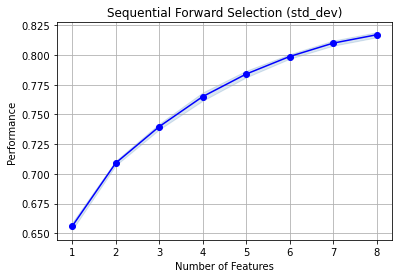

In [74]:
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (std_dev)')
plt.grid()
plt.show()

In [129]:
#Feature importance
sfs1_metrics = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
# 8 features have better metrics.
sfs1_features = list(sfs1_metrics['feature_names'][8])
print("Features Selected:", sfs1_features)
cols = dadosTreino.columns
for i in sfs1_features:
    print("Features Selected:",cols[int(i)])

Features Selected: ['0', '12', '32', '39', '46', '51', '70', '72']
Features Selected: average
Features Selected: amplitude
Features Selected: GC
Features Selected: AAA
Features Selected: ACT
Features Selected: ATA
Features Selected: CTT
Features Selected: GAC


In [96]:
X_train_sfs1 = sfs1.transform(X)
X_test_sfs1 = sfs1.transform(X_teste)

In [102]:
clf_rf_2.fit(X_train_sfs1,y)
rf_pred = clf_rf_2.predict(X_test_sfs1)
y_pred = clf_rf_2.predict_proba(X_test_sfs1)

In [103]:
#Predicao sem validação cruzada
print(rf_pred)
print(y_pred)

[1 1 1 ... 1 0 0]
[[0.  1. ]
 [0.  1. ]
 [0.1 0.9]
 ...
 [0.3 0.7]
 [0.6 0.4]
 [0.9 0.1]]


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado = cross_val_score(rfe, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Random Forest é:', resultado.mean())

In [ ]:
resultado

In [ ]:
rf_pred = rfe.predict(X_teste)

## Calculando as métricas

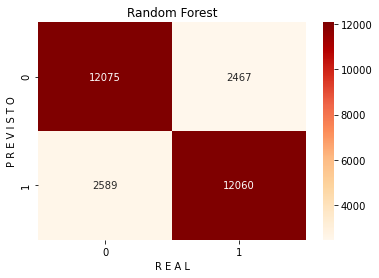

In [104]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_teste, rf_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [112]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf = accuracy_score(y_teste,rf_pred)
especificidade_rf = specificity_score(y_teste,rf_pred)
precisao_rf = precision_score(y_teste,rf_pred)
recall_rf = recall_score(y_teste,rf_pred)
f1Score_rf = f1_score(y_teste,rf_pred)
curva_roc_escore_rf = roc_auc_score(y_teste,rf_pred)
kappa_rf = cohen_kappa_score(y_teste,rf_pred)
print(f'Acurácia:{round(acuracia_rf,2)}')
print(f'Especificidade:{round(especificidade_rf,2)}')
print(f'Precisão:{round(precisao_rf,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf,2)}')
print(f'F1-Score:{round(f1Score_rf,2)}')
print(f'Kappa:{round(kappa_rf,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf,2)}')


Acurácia:0.83
Especificidade:0.83
Precisão:0.83
Recall ou Sensibilidade:0.82
F1-Score:0.83
Kappa:0.65
Curva ROC:0.83


## Curva ROC

In [113]:
import matplotlib.pyplot  as pyplot

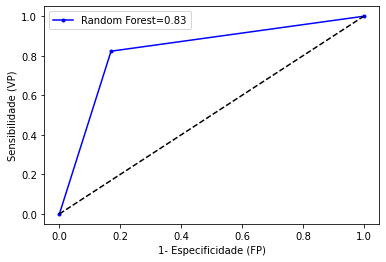

In [114]:
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com Regressão Logística e Wrapper

In [37]:
clf_rl = LogisticRegression(max_iter=2000)

In [38]:
sfs2 = SFS(estimator=clf_rl , 
           k_features=8,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

In [39]:
sfs2 = sfs2.fit(X,y)

## Exibindo as melhores features

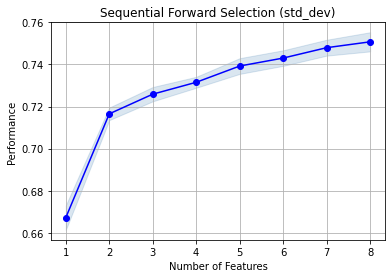

In [40]:
fig = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (std_dev)')
plt.grid()
plt.show()

In [128]:
#Feature importance
sfs2_metrics = pd.DataFrame.from_dict(sfs2.get_metric_dict()).T
# 8 features have better metrics.
sfs2_features = list(sfs1_metrics['feature_names'][8])
print("Features Selected:", sfs2_features)
cols = dadosTreino.columns
for i in sfs2_features:
    print("Features Selected:",cols[int(i)])

Features Selected: ['0', '12', '32', '39', '46', '51', '70', '72']
Features Selected: average
Features Selected: amplitude
Features Selected: GC
Features Selected: AAA
Features Selected: ACT
Features Selected: ATA
Features Selected: CTT
Features Selected: GAC


## Aplicando as features e executar a predição

In [51]:
X_train_sfs2 = sfs2.transform(X)
X_test_sfs2 = sfs2.transform(X_teste)

In [65]:
clf_rl.fit(X_train_sfs2,y)
rl_pred = clf_rl.predict(X_test_sfs2)
y_pred = clf_rl.predict_proba(X_test_sfs2)

In [66]:
print(rl_pred)
print(y_pred)

[1 1 1 ... 1 0 0]
[[0.41080556 0.58919444]
 [0.2933164  0.7066836 ]
 [0.40032847 0.59967153]
 ...
 [0.30955008 0.69044992]
 [0.60019907 0.39980093]
 [0.94469894 0.05530106]]


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_rl = cross_val_score(fit_rl, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_rl.mean())

In [ ]:
resultado_rl

## Calculando as métricas

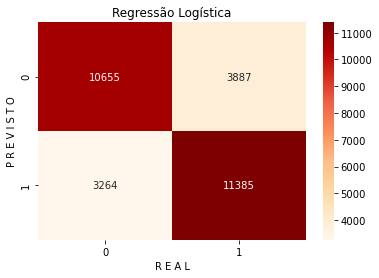

In [67]:
#matriz_conf = confusion_matrix(y_true = y,y_pred = rl_pred)
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, rl_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [68]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl = accuracy_score(y_teste,rl_pred)
especificidade_rl = specificity_score(y_teste,rl_pred)
precisao_rl = precision_score(y_teste,rl_pred)
recall_rl = recall_score(y_teste,rl_pred)
f1Score_rl = f1_score(y_teste,rl_pred)
curva_roc_escore_rl = roc_auc_score(y_teste,rl_pred)
kappa_rl = cohen_kappa_score(y_teste,rl_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_rl,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl,2)}')
print(f'F1-Score:{round(f1Score_rl,2)}')
print(f'Kappa:{round(kappa_rl,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl,2)}')

Acurácia:0.76
Especificidade:0.73
Precisão:0.75
Recall ou Sensibilidade:0.78
F1-Score:0.76
Kappa:0.51
Curva ROC:0.75


## Curva ROC

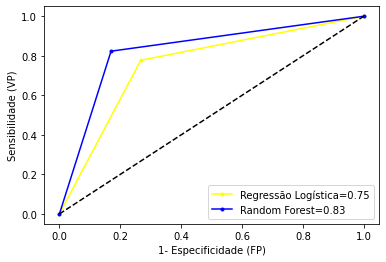

In [115]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

## Aplica o modelo de predição com SVM e Wrapper

In [206]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')

In [ ]:
sfs3 = SFS(estimator=svc, 
           k_features=8,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

In [ ]:
sfs3 = sfs3.fit(X,y)

## Exibindo as principais features

In [ ]:
fig = plot_sfs(sfs3.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (std_dev)')
plt.grid()
plt.show()

In [ ]:
#Feature importance
sfs3_metrics = pd.DataFrame.from_dict(sfs3.get_metric_dict()).T
# 8 features have better metrics.
sfs3_features = list(sfs3_metrics['feature_names'][8])
print("Features Selected:", sfs3_features)

## Aplicando as features e predizer

In [ ]:
X_train_sfs3 = sfs3.transform(X)
X_test_sfs3 = sfs3.transform(X_teste)

In [ ]:
svm.fit(X_train_sfs3,y)
svm_pred = clf_rl.predict(X_test_sfs3)
y_pred = clf_rl.predict_proba(X_test_sfs3)

In [ ]:
print(svm_pred)
print(y_pred

## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_svm = cross_val_score(fit_svm, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_svm.mean()

In [ ]:
resultado_svm

## Calculando as métricas

In [ ]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, svm_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm = accuracy_score(y_teste,svm_pred)
especificidade_svm = specificity_score(y_teste,svm_pred)
precisao_svm = precision_score(y_teste,svm_pred)
recall_svm = recall_score(y_teste,svm_pred)
f1Score_svm = f1_score(y_teste,svm_pred)
curva_roc_escore_svm = roc_auc_score(y_teste,svm_pred)
kappa_svm = cohen_kappa_score(y_teste,svm_pred)
print(f'Acurácia:{round(acuracia_rl,2)}')
print(f'Especificidade:{round(especificidade_svm,2)}')
print(f'Precisão:{round(precisao_rl,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm,2)}')
print(f'F1-Score:{round(f1Score_svm,2)}')
print(f'Kappa:{round(kappa_svm,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm,2)}')

## Curva ROC

In [ ]:
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
#rfp_svm, rvp_svm,lim3 = roc_curve(y_teste,svm_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='yellow')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
#pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,2)),color='red')
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

# Autoencoders

In [116]:
# Importanfo as bibliotecas
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [117]:
#Verificando X e Y
print(X.shape, y.shape, X_teste.shape, y_teste.shape)

(68111, 86) (68111,) (29191, 86) (29191,)


In [184]:
#Pegando os números de input
n_inputs = X.shape[1]
#definindo o encoder
visible = Input(shape=(n_inputs,))

In [185]:
#Encoder nível 1. Definindo a primeira camada oculta
#e = Dense(n_inputs*2)(visible)
e = Dense(n_inputs)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [186]:
# Encoder nível 2. Definindo a segunda camada oculta
e = Dense(n_inputs)(visible)
#Usando a nomalização em lote para garantir que o modelo aprenda bem
e = BatchNormalization()(e)
#Definindo a função de ativação Relu
e = LeakyReLU()(e)

In [187]:
#Camada de redução. aqui que acontece a redução
#n_bottleneck = round(float(n_inputs) / 2.0)
#n_bottleneck = 8
#Teste com 15 e 20 - não houve diferença
n_bottleneck = 15
#n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(e)

In [188]:
#Definindo o decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [189]:
#Definindo o decoder nível 2
#d = Dense(n_inputs*2)(d)
d = Dense(n_inputs)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [190]:
#Camada de saída usando a função de ativação
#É a função mais básica porque não altera a saída de um neurônio
#output = Dense(n_inputs, activation='linear')(d)
output = Dense(n_inputs, activation='relu')(d)

In [191]:
#definindo o modelo de autoencoder model
model = Model(inputs=visible, outputs=output)

In [192]:
#Compilando o modelo autoencoder
#adam =  função com base no método de descida gradiente estocástico. Tende a convergir rapidamente.
#binary_crossentropy  = um função utilizada para problemas de classificação binária (0 ou 1)
# mse = calcula a média dos quadrados dos erros entre rótulos e previsões
#model.compile(optimizer='adam', loss='binary_crossentropy')
#RMSprop
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer='rmsprop', loss='mse')

In [193]:
#Ajustar o modelo autoencoder para reconstruir a entrada 
history = model.fit(X,X, epochs=100, batch_size=64, verbose=2, validation_data=(X_teste,X_teste))

Epoch 1/100
1065/1065 - 5s - loss: 0.0017 - val_loss: 5.9665e-04
Epoch 2/100
1065/1065 - 3s - loss: 3.7619e-04 - val_loss: 4.9441e-04
Epoch 3/100
1065/1065 - 3s - loss: 2.4884e-04 - val_loss: 0.0010
Epoch 4/100
1065/1065 - 3s - loss: 1.8864e-04 - val_loss: 6.0207e-04
Epoch 5/100
1065/1065 - 3s - loss: 1.6599e-04 - val_loss: 5.2995e-04
Epoch 6/100
1065/1065 - 3s - loss: 1.4825e-04 - val_loss: 3.3400e-04
Epoch 7/100
1065/1065 - 3s - loss: 1.3908e-04 - val_loss: 1.2132e-04
Epoch 8/100
1065/1065 - 3s - loss: 1.3642e-04 - val_loss: 2.8650e-04
Epoch 9/100
1065/1065 - 3s - loss: 1.2624e-04 - val_loss: 0.0011
Epoch 10/100
1065/1065 - 3s - loss: 1.2098e-04 - val_loss: 1.2710e-04
Epoch 11/100
1065/1065 - 3s - loss: 1.2622e-04 - val_loss: 2.3704e-04
Epoch 12/100
1065/1065 - 3s - loss: 1.1385e-04 - val_loss: 2.5651e-04
Epoch 13/100
1065/1065 - 3s - loss: 1.1223e-04 - val_loss: 4.2363e-04
Epoch 14/100
1065/1065 - 3s - loss: 1.0444e-04 - val_loss: 2.7841e-04
Epoch 15/100
1065/1065 - 3s - loss: 1.009

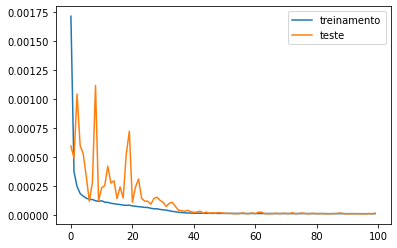

In [194]:
# Com a função de perda MSE 100 cópia
pyplot.plot(history.history['loss'], label='treinamento')
pyplot.plot(history.history['val_loss'], label='teste')
pyplot.legend()
pyplot.show()

In [195]:
# definir um modelo de codificador (sem o decodificador) 
encoder = Model(inputs=visible, outputs=bottleneck)

In [196]:
# salvo o encoder para usar depois
encoder.save('encoder_projeto.h5')

## Treinando um modelo Random Forest com a rede neural

In [197]:
# Carrega o modelo
from tensorflow.keras.models import load_model
encoder = load_model('encoder_projeto.h5')

In [198]:
# Treinando no encoder
X_train_encode = encoder.predict(X)
# encode the test data
X_test_encode = encoder.predict(X_teste)

In [199]:
#Define o modelo copia MSE
floresta = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=123) 
#Ajuste do modelo do conjunto de treinamento
floresta.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rf = floresta.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rf)
print(acc)

0.8152512760782433


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_rf = cross_val_score(floresta, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_rf.mean()

In [ ]:
resultado_rf

## Calculando as métricas

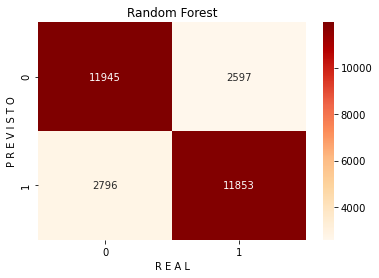

In [200]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Random Forest')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [212]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf_rede = accuracy_score(y_teste,pred_rf)
especificidade_rf_rede = specificity_score(y_teste,pred_rf)
precisao_rf_rede = precision_score(y_teste,pred_rf)
recall_rf_rede = recall_score(y_teste,pred_rf)
f1Score_rf_rede = f1_score(y_teste,pred_rf)
curva_roc_escore_rf_rede = roc_auc_score(y_teste,pred_rf)
kappa_rf_rede = cohen_kappa_score(y_teste,pred_rf)
print(f'Acurácia:{round(acuracia_rf_rede,2)}')
print(f'Especificidade:{round(especificidade_rf_rede,2)}')
print(f'Precisão:{round(precisao_rf_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf_rede,2)}')
print(f'F1-Score:{round(f1Score_rf_rede,2)}')
print(f'Kappa:{round(kappa_rf_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf_rede,2)}')

Acurácia:0.82
Especificidade:0.82
Precisão:0.82
Recall ou Sensibilidade:0.81
F1-Score:0.81
Kappa:0.63
Curva ROC:0.82


## Treinando um modelo de Regressão Logística com a rede neural.

In [202]:
#Define o modelo
model = LogisticRegression(max_iter=2000)
#Ajuste do modelo do conjunto de treinamento
model.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_rl = model.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_rl)
print(acc)

0.7518755780891371


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_rl = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_rl.mean()

In [ ]:
resultado_rl

## Calculando as métricas

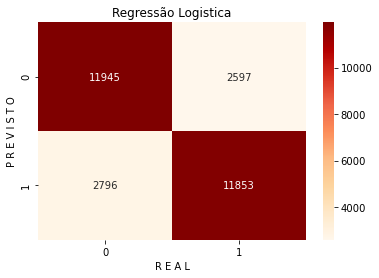

In [203]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_rf), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logistica')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [204]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rl_rede = accuracy_score(y_teste,pred_rl)
especificidade_rl_rede = specificity_score(y_teste,pred_rl)
precisao_rl_rede = precision_score(y_teste,pred_rl)
recall_rl_rede = recall_score(y_teste,pred_rl)
f1Score_rl_rede = f1_score(y_teste,pred_rl)
curva_roc_escore_rl_rede = roc_auc_score(y_teste,pred_rl)
kappa_rl_rede = cohen_kappa_score(y_teste,pred_rl)
print(f'Acurácia:{round(acuracia_rl_rede,2)}')
print(f'Especificidade:{round(especificidade_rl_rede,2)}')
print(f'Precisão:{round(precisao_rl_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rl_rede,2)}')
print(f'F1-Score:{round(f1Score_rl_rede,2)}')
print(f'Kappa:{round(kappa_rl_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rl_rede,2)}')

Acurácia:0.75
Especificidade:0.73
Precisão:0.74
Recall ou Sensibilidade:0.77
F1-Score:0.76
Kappa:0.5
Curva ROC:0.75


## Treinando um modelo de SVM com a rede neural.

In [207]:
svc_r = SVC(C=1, kernel='linear')
#Ajuste do modelo do conjunto de treinamento
svc_r.fit(X_train_encode,y)
#Faz a predição no conjunto de teste
pred_svm = svc_r.predict(X_test_encode)
#Calcula accuracy
acc = accuracy_score(y_teste,pred_svm)
print(acc)

0.7569113767942174


## Validação cruzada no conjunto reduzido

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
resultado_svm = cross_val_score(svc_r, X, y, cv=kfold, scoring='accuracy')

In [ ]:
print('O score cross-validado do Regressão Logística é:', resultado_svm.mean()

In [ ]:
resultado_svm

## Calculando as métricas

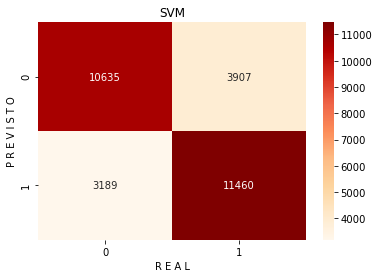

In [209]:
#Matriz de confusão
sns.heatmap(confusion_matrix(y_teste, pred_svm), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVM')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [210]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm_rede = accuracy_score(y_teste,pred_svm)
especificidade_svm_rede = specificity_score(y_teste,pred_svm)
precisao_svm_rede = precision_score(y_teste,pred_svm)
recall_svm_rede = recall_score(y_teste,pred_svm)
f1Score_svm_rede = f1_score(y_teste,pred_rl)
curva_roc_escore_svm_rede = roc_auc_score(y_teste,pred_svm)
kappa_svm_rede = cohen_kappa_score(y_teste,pred_svm)
print(f'Acurácia:{round(acuracia_svm_rede,2)}')
print(f'Especificidade:{round(especificidade_svm_rede,2)}')
print(f'Precisão:{round(precisao_rl_rede,2)}')
print(f'Recall ou Sensibilidade:{round(recall_svm_rede,2)}')
print(f'F1-Score:{round(f1Score_svm_rede,2)}')
print(f'Kappa:{round(kappa_svm_rede,2)}')
print(f'Curva ROC:{round(curva_roc_escore_svm_rede,2)}')

Acurácia:0.76
Especificidade:0.73
Precisão:0.74
Recall ou Sensibilidade:0.78
F1-Score:0.76
Kappa:0.51
Curva ROC:0.76


## Curva ROC: Wrapper X Autoencoder

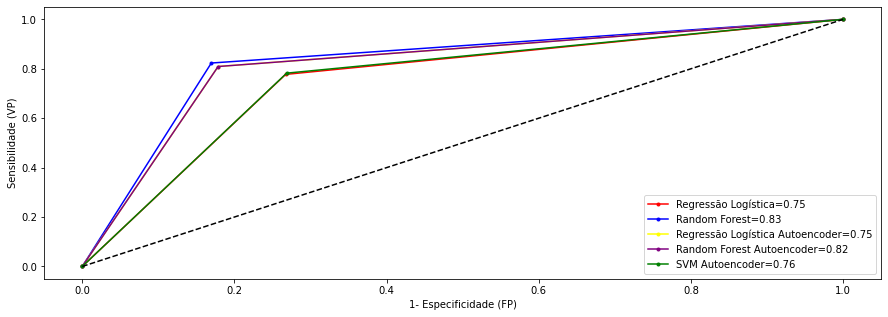

In [215]:
#Wrapper
rfp_rl, rvp_rl,lim1 = roc_curve(y_teste,rl_pred)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,rf_pred)
#rfp_svm, rvp_svm,lim3 = roc_curve(y_teste,svm_pred)
pyplot.plot(rfp_rl, rvp_rl, marker='.', label='Regressão Logística='+str(round(curva_roc_escore_rl,2)),color='red')
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color='blue')
#pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,2)),color='red')

#Autoencoder
rfp_rl_rede, rvp_rl_rede,lim7 = roc_curve(y_teste,pred_rl)
rfp_rl_rede, rvp_rl_rede,lim8 = roc_curve(y_teste,pred_rf)
rfp_svm_rede, rvp_svm_rede,lim9 = roc_curve(y_teste,pred_svm)
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Regressão Logística Autoencoder='+str(round(curva_roc_escore_rl_rede,2)),color='yellow')
plt.plot(rfp_rl_rede, rvp_rl_rede, marker='.', label='Random Forest Autoencoder='+str(round(curva_roc_escore_rf_rede,2)),color='purple')
plt.plot(rfp_svm_rede, rvp_svm_rede, marker='.', label='SVM Autoencoder='+str(round(curva_roc_escore_svm_rede,2)),color='green')

pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
# Mostrando o gráfico
plt.rcParams["figure.figsize"] = (15, 5)
plt.show()